# Breath search

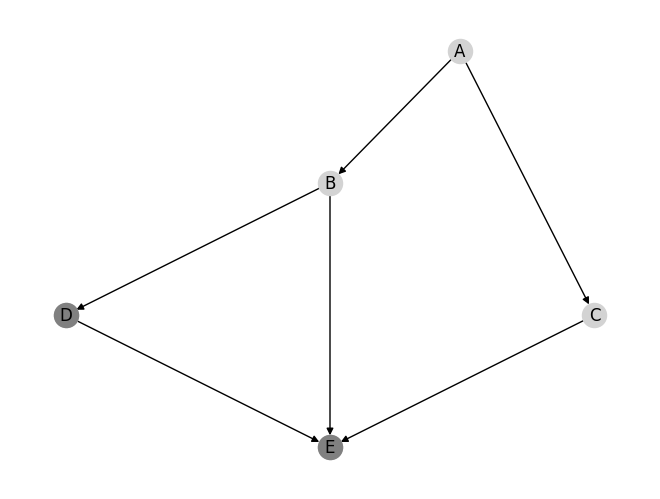

In [77]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['D','E'],'C':['E'],'D':['E']}
source='A'
Target=['D','E']
nxG=nx.DiGraph(G)
pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot',root=source)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray")
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray')


## Breath-first search algorithm
BFS(G,source)  
> Open = Queue(source)  
> Closed = $\emptyset$  
> while Open != $\emptyset$
>> s = Unqueue(Open)  
>> Closed = Closed $\cup$ $\{s\}$  
>> for n $\in$ Adjacents(G,s)  
>>> if n $\notin$ Closed  
>>>> if n $\notin$ Open  
>>>>> if Target(n) return n  
>>>>> Append(Open,n)  
return NULL

### BFS implementation returning the target node that was reached

In [78]:
# G is a graph represented as an adjancency list. 
# source is the label (string) of the source node
# target is the list of target nodes
def bfs(G, source, Target):
  if source in Target: 
    return source
  # Open is a list of nodes to be visited. FIFO list of nodes
  Open=[]; Open.append(source)
  # Closed is a list of visited nodes.  FIFO list of nodes
  Closed=[]; 
	
  while Open != []:
    node = Open[0]; Open.pop(0)
    Closed.append(node)
    for child in G[node]:
      if child not in Closed:
        if child not in Open:
          if child in Target: 
            return child
          Open.append(child)
				
				
print(bfs(G,source,Target))

D


### BFS implementation returning the path from the source to the target node

In [57]:
def path2source(node, target, Closed):
  path = [target]
  while node != None:
    path.insert(0,node)
    node = Closed[node]
  return path

def bfs(G, source, target):
  if source == target: 
    path = [source]; return path
  # Open is a list of nodes to be visited. FIFO list of tuples (node, parent)
  Open=[]; Open.append((source,None))
  # Closed is a list of visited nodes.  Hash table of key: node and value: parent
  Closed={}; 
	
  while Open != []:
    (node,parent) = Open[0]; Open.pop(0)
    Closed.update({node:parent})
    for child in G[node]:
      if child not in Closed:
        if child not in [n for (n,p) in Open]:
          if child == target: 
            return path2source(node, target, Closed)
          Open.append((child,node))
				
				
print(bfs(G,'A','E'))


['A', 'C', 'E']


In [41]:
lista = [('A','a'),('B','b')]
c='A'
if c in [a for (a,b) in lista]:
  print(c)

A


In [48]:
 Open=Queue(); Open.put(('A','a')); Open.put(('B','b'))
 c='A'
for c in [a for (a,b) in Open]:
    print(c)

TypeError: 'Queue' object is not iterable

In [ ]:
print(nx.shortest_path(G,source='A',target='E'))
print(sorted(list(nx.bfs_tree(G,source='A',depth_limit=3).edges())))